# Colour Magnitude Diagram

In [1]:
from matplotlib import pyplot as plt
import numpy as np

### Reading Table from the file
Reference : https://stackoverflow.com/questions/37956344/reading-and-doing-calculation-from-dat-file-in-python (Answer by Bill)

In [2]:
datContent = [i.strip().split() for i in open("HIP2008_SpT_Mv_75pc_plxSN8.dat.txt").readlines()]
data = datContent[14:]

### Extrating Content from Raw Data

In [3]:
BV, eBV, Mv = [], [], []

for i in range(len(data)):
    BV.append(float(data[i][11]))
    eBV.append(float(data[i][12])/2)
    Mv.append(float(data[i][14]))

Lum = [(3.0128e28)*(10**(-0.4*Mv[i])) for i in range(len(data))]
lsz = [(Lum[i]/6.0e25) for i in range(len(data))]

Temp = [4600 * (1 / (0.92 * BV[i] + 1.7) + 1 / (0.92 * BV[i] + 0.62)) for i in range(len(data))]

Rad = [((Lum[i]/(4*np.pi*5.67e-8))**0.5)/(Temp[i]**2) for i in range(len(data))]
rsz = [Rad[i]/4.0e7 for i in range(len(data))]

### Converting Temperature of Black Body to its Color in RGB format
Reference : ./Temp2RGB.ipynb

In [4]:
redco = [8.070262721346884e-43, -1.7822365249781715e-37, 1.698550943439023e-32, -9.129690304649708e-28, 3.0329097323270086e-23, -6.408747736872114e-19, 8.520955811618884e-15, -6.767795593255865e-11, 2.871116181869308e-07, -0.0005616004467246696, 1.3752268737109337]
greenco = [9.41783374937086e-43, -2.0904603639676894e-37, 2.0046562200022528e-32, -1.0856465115272846e-27, 3.639668275215942e-23, -7.774218501050065e-19, 1.0453456993525022e-14, -8.342671794339795e-11, 3.390372713889161e-07, -0.00041373338121682504, 0.24265570846560314]
blueco = [6.3450498895169725e-43, -1.5016093567517676e-37, 1.54246935772314e-32, -9.002772829335035e-28, 3.280207151424187e-23, -7.709035443731048e-19, 1.1634007450620049e-14, -1.0807782765342989e-10, 5.555046305575244e-07, -0.0011690728742620394, 0.7935359432315083]

redco = np.poly1d(redco)
greenco = np.poly1d(greenco)
blueco = np.poly1d(blueco)

def temp2rgb(temp):
    red = redco(temp)
    green = greenco(temp)
    blue = blueco(temp)

    if red > 1:
        red = 1
    elif red < 0:
        red = 0
    if green > 1:
        green = 1
    elif green < 0:
        green = 0
    if blue > 1:
        blue = 1
    elif blue < 0:
        blue = 0

    color = (red, green, blue)
    return color

### Absolute Magnitude VS Color
(Size of Marker linearly dependent on Magnitude)

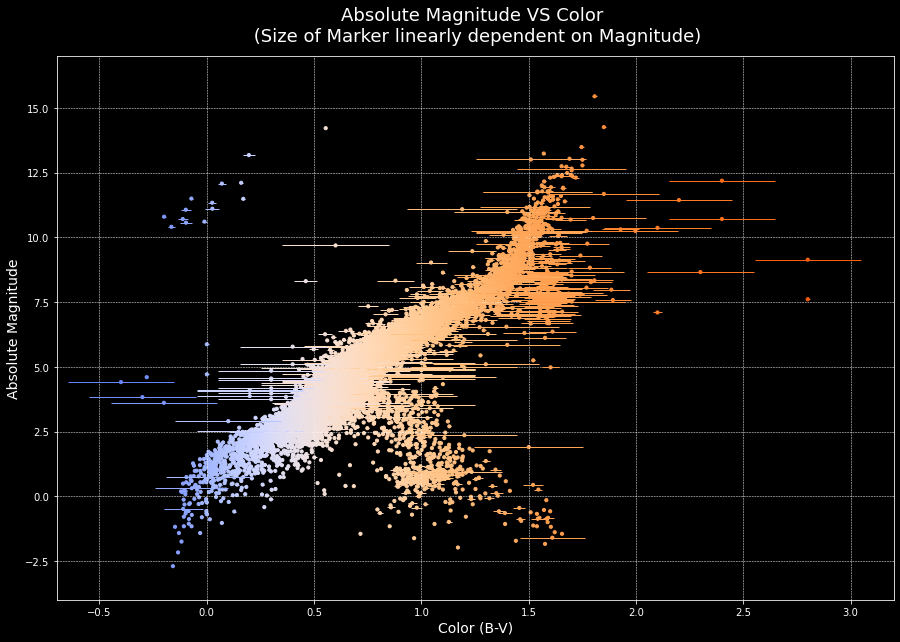

In [5]:
plt.figure(figsize=(15,10), facecolor='Black')
plt.style.use(['dark_background'])
clr = []
for i in range(len(data)):
    clr.append(temp2rgb(Temp[i]))
plt.scatter(BV, Mv, s=10,c=clr)
plt.errorbar(BV, Mv, xerr=eBV, ecolor=clr, ls='', elinewidth=1)
plt.xlim(-0.7,3.2)
plt.ylim(-4.0,17.0)
plt.xlabel('Color (B-V)', {'fontsize': 14})
plt.ylabel('Absolute Magnitude', {'fontsize': 14})
plt.title('Absolute Magnitude VS Color \n (Size of Marker linearly dependent on Magnitude)', {'fontsize': 18}, pad=15)
plt.grid(True, linestyle='--', linewidth=0.5)
plt.show()

### Absolute Magnitude VS Color
(Size of Marker proportional to Luminosity)

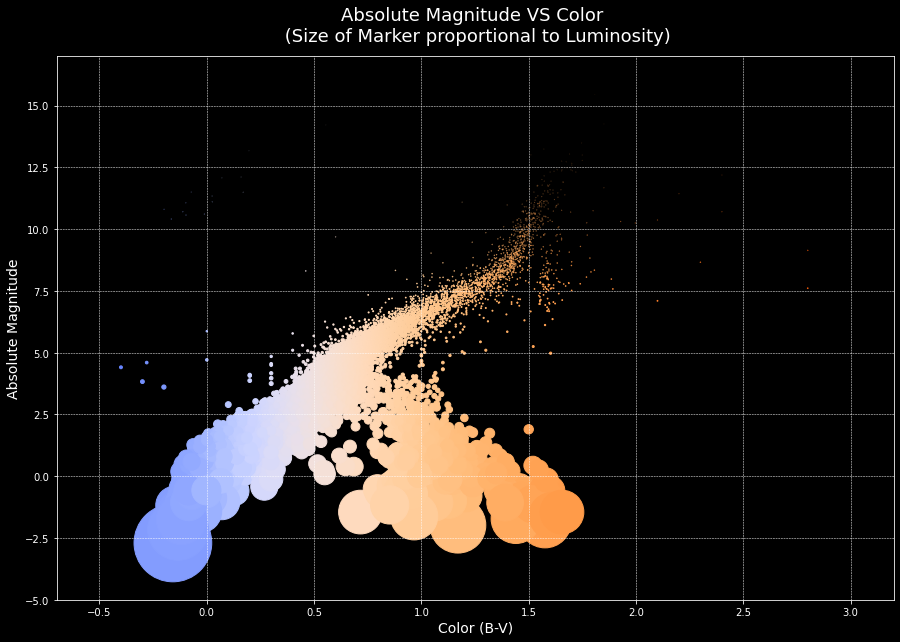

In [6]:
plt.figure(figsize=(15,10), facecolor='Black')
plt.style.use(['dark_background'])
clr = []
for i in range(len(data)):
    clr.append(temp2rgb(Temp[i]))
plt.scatter(BV, Mv, s=lsz,c=clr)
plt.xlim(-0.7,3.2)
plt.ylim(-5.0,17.0)
plt.xlabel('Color (B-V)', {'fontsize': 14})
plt.ylabel('Absolute Magnitude', {'fontsize': 14})
plt.title('Absolute Magnitude VS Color \n (Size of Marker proportional to Luminosity)', {'fontsize': 18}, pad=15)
plt.grid(True, linestyle='--', linewidth=0.5)
plt.show()

### Absolute Magnitude VS Color
(Size of Marker proportional to Radius)

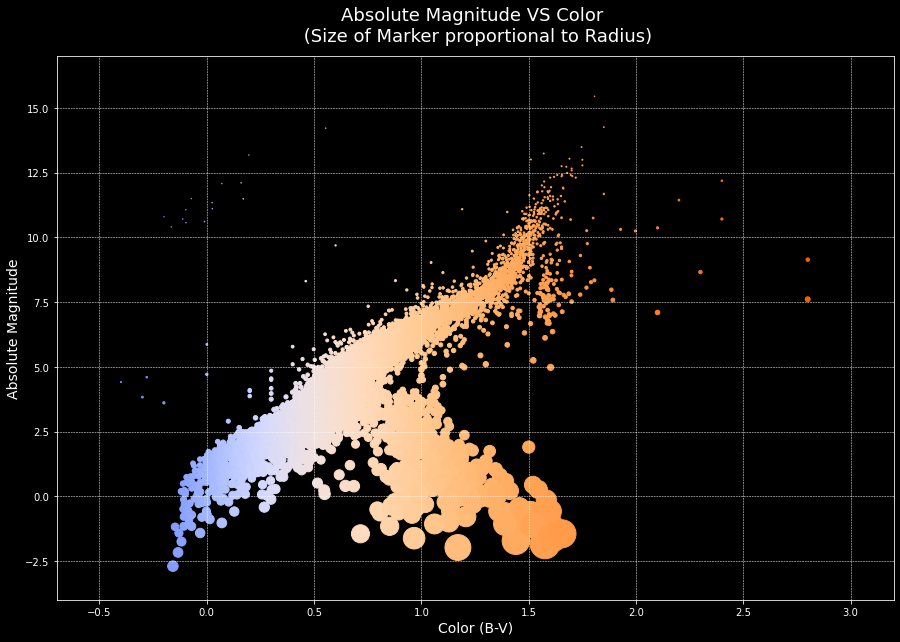

In [7]:
plt.figure(figsize=(15,10), facecolor='Black')
plt.style.use(['dark_background'])
clr = []
for i in range(len(data)):
    clr.append(temp2rgb(Temp[i]))
plt.scatter(BV, Mv, s=rsz,c=clr)
plt.xlim(-0.7,3.2)
plt.ylim(-4.0,17.0)
plt.xlabel('Color (B-V)', {'fontsize': 14})
plt.ylabel('Absolute Magnitude', {'fontsize': 14})
plt.title('Absolute Magnitude VS Color \n (Size of Marker proportional to Radius)', {'fontsize': 18}, pad=15)
plt.grid(True, linestyle='--', linewidth=0.5)
plt.show()

## The End